# Infinity Mirror Test

Infinity Mirror Test for Analyzing the Robustness of Graph Generators

This notebook provides detail information to help better understand our [paper](http://arxiv.org/abs/1606.04412). We will demonstrate how we applied the *infinity mirror* test to models inferred from a real network. This code is licensed under a BSD license. See [license file](http://www.nd.edu/~saguinag/LICENSE).

In [1]:
%matplotlib inline
import os
import networkx as nx

In [2]:
# --< BEGIN >--
ds_dir =      "./datasets/"   # Directory path containing your network datasets of interest
results_dir = "./Results/" # Replace this with the directory you want to save the results
tmp_dir =     "/tmp"          # Replace this with the directory you want to save the SFrame to

## 1. Load a graph

The words network and graph are used interachangeably through out.

In [3]:
# url = "http://konect.uni-koblenz.de/downloads/tsv/flickrEdges.tar.bz2"
# tar --extract --file=flickrEdges.tar.bz2 "flickrEdges/out.flickrEdges*"
nFname = ds_dir+"karate.txt" # get file from url above
gname  = os.path.basename(nFname).rstrip('.txt')
graph  = nx.read_edgelist(nFname)
graph.name=gname
print nx.info(graph)


Name: karate
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


## 2. Learn a model using Hyperedge Replacement Grammars (HRGs)

Here we iterate 10 times by learning and growing a synthetic graph. Each time a model is learned from the last created graph. We store each 10th graph in a list. We compute network statistics on these group of graphs.

In [4]:
import PhoenixPython.PHRG as phrg
import PhoenixPython.probabilistic_cfg as pcfg

G = graph
Hstars = []
ProdRulesKth =[]
for j in range(0,20):
    for k in range(0,10):
        # print ("\tGraph #:",k+1)
        prod_rules = phrg.probabilistic_hrg_learning(G)
        # initialize the Grammar g
        g = pcfg.Grammar('S')

        for (id, lhs, rhs, prob) in prod_rules:
            g.add_rule(pcfg.Rule(id, lhs, rhs, prob))

        num_nodes = G.number_of_nodes()
        g.set_max_size(num_nodes)

        #print "Done initializing the grammar data-structure"

        # Generate a synthetic graph using HRGs
        rule_list = g.sample(num_nodes)
        hstar = phrg.grow(rule_list, g)[0]
        G = hstar # feed back the newly created graph
    # store the last synth graph & restart     
    Hstars.append(hstar) #
        


--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Production Rules -
--------------------
T

--------------------
-Tree Decomposition-
--------------------

--------------------
- Pr

Degree
Hops
Clustering Coef
Assortativity
kcore_decomposition


/Users/saguinag/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


eigenvec
GCD


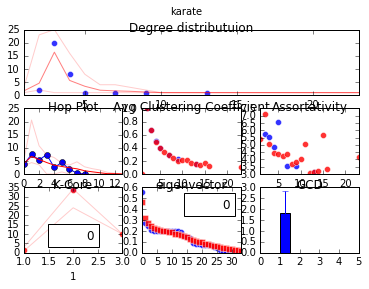

In [5]:
import matplotlib.pyplot as plt 
import PhoenixPython.net_metrics as metrics

# Compute network property statistics and compare them to those of the original graph
net_properties = [ 'degree','hops', 'clust', 'assort', 'kcore','eigen','gcd']
metrics.network_properties( [G], net_properties, Hstars, name=gname, out_tsv=True)
plt.show()#savefig('/tmp/outfig', bb_inches='tight')

NameError: name 'plt' is not defined

In [19]:
import tarfile
from urllib.request import urlopen


url = "http://konect.uni-koblenz.de/downloads/tsv/flickrEdges.tar.bz2"
filename = '/tmp/temp.file'  
req = urlopen(url)
CHUNK = 16 * 1024

decompressor = bz2.BZ2Decompressor()
with open(filename, 'wb') as fp:
    while True:
        chunk = req.read(CHUNK)
        if not chunk:
            break
        fp.write(decompressor.decompress(chunk))
req.close()

In [16]:
# Example, compatible with both Python2 and Python3:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
from urllib.request import urlopen
import sys
import os
import bz2
from bz2 import decompress

# Get zip file from website
# url = "http://www.7-zip.org/a/7z920.tar.bz2"  # just an example bz2 file
url = "http://konect.uni-koblenz.de/downloads/tsv/flickrEdges.tar.bz2"

archive = StringIO()

# in case the request fails (e.g. 404, 500), this will raise
# a `urllib2.HTTPError`
url_data = urlopen(url)

archive.write(url_data.read().decode("utf-8"))

# will print how much compressed data you have buffered.
print ("Length of file:", archive.tell())

# important!... make sure to reset the file descriptor read position
# to the start of the file.
# archive.seek(0)

# # Extract the training data
# data = bz2.decompress(archive.read())

# # Write to csv
# output_file = open('output_file', 'w')
# output_file.write(data)
# # filename = os.path.basename(filepath)
# newfilepath = os.path.join(tmp_dir, filename + '.decompressed')
# with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
#     for data in iter(lambda : file.read(100 * 1024), b''):
#         new_file.write(data)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 10: invalid start byte

## The BTER model

We use the work provided by Tamara Kolda and her group, [BTER Guide: How to create a BTER graph that matches an existing graph](http://www.sandia.gov/~tgkolda/feastpack/doc_bter_match.html). The only difference is that we work with edgelist files (in `.txt` format).  This code is in the `Matlab` folder. We can infer a graph that matches the original in `oneoffbter.m`. Moreover, `infmir_bter.m` will do this over a series of recurrences where the output are graphs corresponding to the recurrence number.


In [2]:
def graph_model_inducer_hrgs(G, iths = 1, avgs=1):
    ''' graph model inducer: HRGs
    '''
    
    return

def graph_model_inducer_chung_lu(G):
    ''' graph model inducer: Chung Lu
    '''
    
    return

def graph_model_inducer_bter(gname):
    ''' graph model inducer: BTER
    This relies on the Matlab code provided in this </> sample
    param:   gname the graph name will help us fetch the files generated
             from the Matlab BTER code.
    returns: list of graph (nx) objects
    '''
    import glob
    bter_graphs = []
    files = glob.glob("./datasets/bter_"+gname+"*.tsv")
    for f in files:
        try: 
            bter_graphs.append(nx.read_edgelist(f))
        except Exception, e:
            print str(e)
    
    return bter_graphs

def graph_model_inducer_kron(G,gname, iths = 1, avgs=1):
    ''' Graph model inducer: Kronecker Product
    returns: list of graphs 
    '''
    import hrgs.salPHRG as hrgs
    kron_graphs = []
    for n in range(avgs): # TODO: avgs is not being handle correctly!!
        kp = hrgs.grow_graphs_using_krongen(G,gname,iths)
        kron_graphs.append(kp)
    return kron_graphs

def learn_network_model(graph, graph_name, graph_generator, itrs=1):
    ''' Learn network model 
    param: graph is the input graph (networkx obj)
    param: graph_name (str obj)
    param: graph_generator (str obj)
    param: itrs nbr of iterations 
    returns: theta graph model
    '''
    graphlst = None
    if graph_generator is 'chlu':
        graph_model_inducer_chung_lu(graph)
    elif graph_generator is 'kron': 
        graphlst = graph_model_inducer_kron(graph, graph_name, iths=itrs)
    elif graph_generator is 'bter':
        graph_model_inducer_bter(graph, graph_name)
    elif graph_generator is 'hrgs':
        graph_model_inducer_hrgs(graph, graph_name)
    else:
        return

    return graphlst    

   

In [3]:
# ---< begin >---
# Processing each of the input files
genmodels = ['kron']
for f in  input_networks_edgelist(base_dir):
    if 'karate' not in f:
        continue
    
    print("Reading edgelist file: %s " % f)
    G = load_network(f)
    # print nx.info(G)
    # print nx.average_degree_connectivity(G)
    gname = os.path.basename(f).split('.')[0].lower()
    for ggen in genmodels:
        graphs_lst = learn_network_model(G,gname,graph_generator=ggen, itrs=10) 
        if graphs_lst is not None:
            print '~'*20,'\n',(nx.average_degree_connectivity( graphs_lst[0]))
            print nx.info(graphs_lst[0])
            print 'vs'
            
            print nx.average_degree_connectivity(G)
            print nx.info(G)
            
    break
 

Reading edgelist file: ./datasets/karate.txt 
k: 6 n 34
/tmp/outfig75
k: 6 n 47
/tmp/outfig76
k: 6 n 47
/tmp/outfig77
k: 6 n 46
/tmp/outfig78
k: 6 n 49
/tmp/outfig79
k: 6 n 42
/tmp/outfig80
k: 6 n 40
/tmp/outfig81
k: 6 n 35
/tmp/outfig82
k: 6 n 35
/tmp/outfig83
k: 6 n 40
/tmp/outfig84
~~~~~~~~~~~~~~~~~~~~ 
{1: 2.75, 2: 2.7142857142857144, 3: 2.6666666666666665, 4: 2.625, 5: 2.2, 6: 3.5}
Name: 
Type: Graph
Number of nodes: 36
Number of edges: 34
Average degree:   1.8889
vs
{1: 16.0, 2: 12.409090909090908, 3: 8.222222222222221, 4: 8.541666666666666, 5: 10.466666666666667, 6: 8.333333333333334, 9: 5.777777777777778, 10: 6.6, 12: 5.083333333333333, 16: 4.3125, 17: 3.823529411764706}
Name: 
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


:0: FutureWarning: IPython widgets are experimental and may change in the future.


Name: 
Type: Graph
Number of nodes: 1330
Number of edges: 2675
Average degree:   4.0226


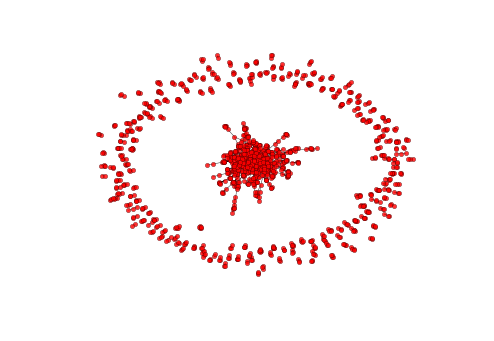

In [25]:
# BTER 
# example for dataset `netscience` bter graphs (edgelist)
import matplotlib.pyplot as plt
limits=plt.axis('off') # turn of axis

nxgraphs = graph_model_inducer_bter('netscience')
for g in nxgraphs:
    print nx.info(g)
    nx.draw_networkx(g,pos=nx.spring_layout(g), node_size=20, with_labels=False, width =0.5, alpha=0.8)   
    break